In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [2]:
train = pd.read_csv('train_Wc8LBpr.csv')
test = pd.read_csv('test_VsU9xXK.csv')
sample = pd.read_csv('sample_submission_NoPBkjr.csv')

In [3]:
train.shape

(131662, 14)

In [4]:
test.shape

(87395, 13)

In [5]:
df = train.append(test)

In [6]:
df.shape

(219057, 14)

In [7]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2.0
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2.0
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2.0
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3.0
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2.0


In [8]:
df.tail()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
87390,T0005908503,29.43,C,3.0,2.40720,C,A,0.99750,0,74.0,48,72,Female,NaN
87391,T0005908504,14.83,C,10.0,2.57009,A,D,4.74375,0,109.0,42,60,Female,NaN
87392,T0005908505,37.86,A,6.0,3.08227,C,A,1.63500,0,NaN,57,77,Male,NaN
87393,T0005908511,10.63,C,1.0,NaN,NaN,J,2.59875,1,107.0,51,77,Male,NaN
87394,T0005908515,37.96,B,10.0,3.00274,A,A,2.05500,0,NaN,48,73,Female,NaN


In [9]:
df.isna().sum()

Trip_ID                             0
Trip_Distance                       0
Type_of_Cab                     33368
Customer_Since_Months            9886
Life_Style_Index                33520
Confidence_Life_Style_Index     33520
Destination_Type                    0
Customer_Rating                     0
Cancellation_Last_1Month            0
Var1                           117819
Var2                                0
Var3                                0
Gender                              0
Surge_Pricing_Type              87395
dtype: int64

In [10]:
 # df[['Life_Style_Index','Confidence_Life_Style_Index']].head()
# df_temp1 =df[['Life_Style_Index','Confidence_Life_Style_Index']]
# df_temp1.head(2)
# df_temp1[df_temp1.isna().any(axis=1)]   

# Univariate

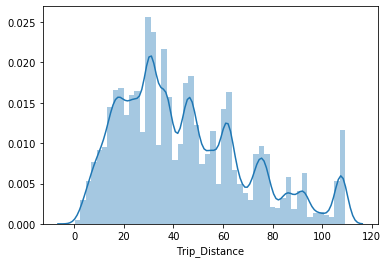

In [11]:
sns.distplot(df['Trip_Distance'],hist=True)

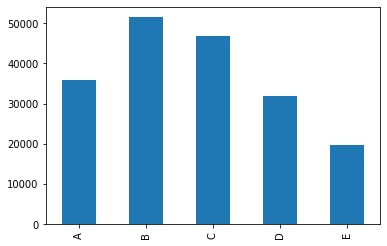

In [12]:
df['Type_of_Cab'].value_counts().sort_index().plot(kind = 'bar')

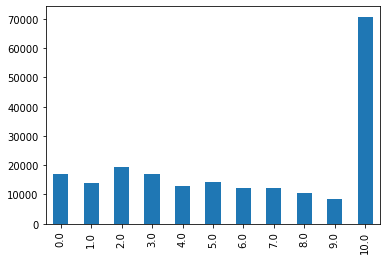

In [13]:
df['Customer_Since_Months'].value_counts().sort_index().plot(kind = 'bar')

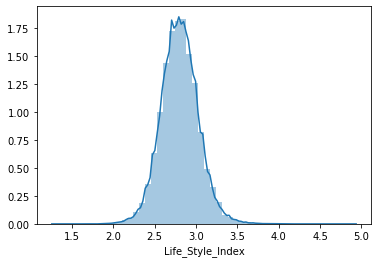

In [14]:
sns.distplot(df['Life_Style_Index'],hist=True)

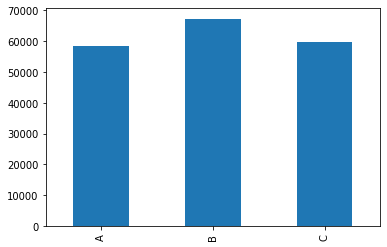

In [15]:
df['Confidence_Life_Style_Index'].value_counts().sort_index().plot.bar()

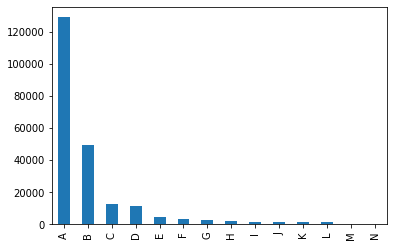

In [16]:
df['Destination_Type'].value_counts().sort_index().plot(kind='bar')

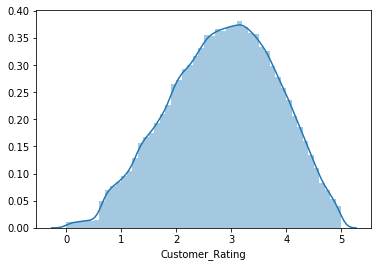

In [17]:
sns.distplot(df['Customer_Rating'],hist=True)

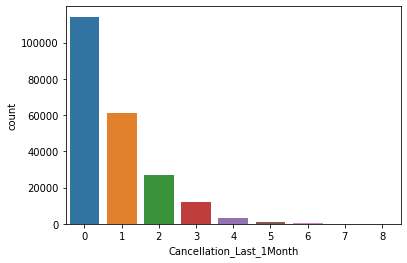

In [18]:
sns.countplot(x='Cancellation_Last_1Month',data=df,label='count')

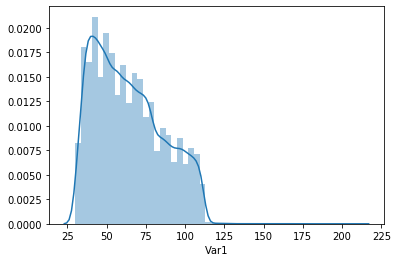

In [19]:
sns.distplot(df['Var1'],hist=True)

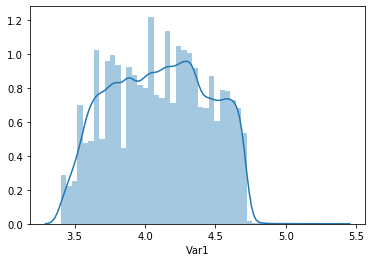

In [316]:
sns.distplot(df['Var1'].apply(np.log),hist=True)

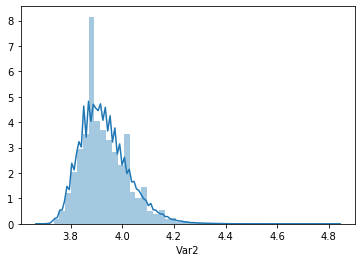

In [325]:
sns.distplot(df['Var2'].apply(np.log),hist=True)

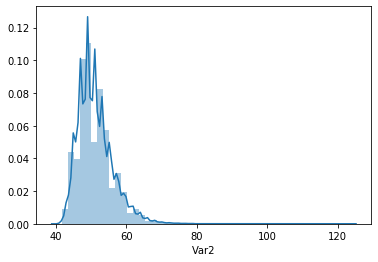

In [326]:
sns.distplot(df['Var2'],hist=True)

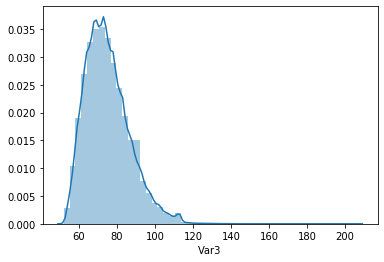

In [21]:
sns.distplot(df['Var3'],hist=True)

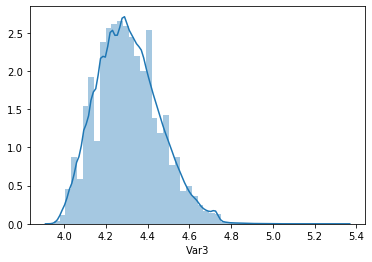

In [327]:
sns.distplot(df['Var3'].apply(np.log),hist=True)

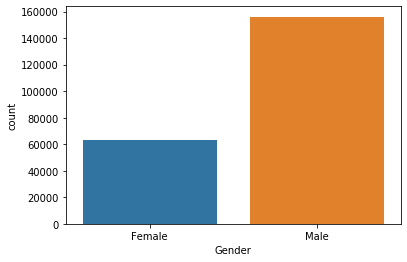

In [22]:
sns.countplot(x='Gender',data=df,label='count')

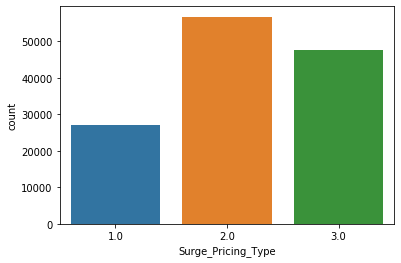

In [23]:
sns.countplot(x='Surge_Pricing_Type',data=df,label='count')

## Bi-variate Analysis

### Surge_Pricing_Type Vs Gender

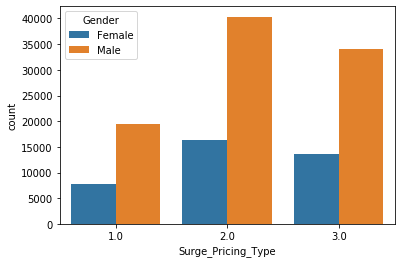

In [24]:
sns.countplot(x='Surge_Pricing_Type',data=df, hue='Gender')

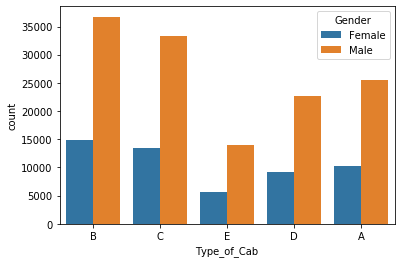

In [25]:
sns.countplot(x='Type_of_Cab',data=df,hue='Gender')

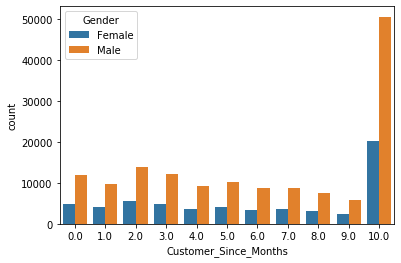

In [26]:
sns.countplot(x='Customer_Since_Months',data=df,hue='Gender')

### Surge_Pricing_Type Vs. Customer_Since_Months

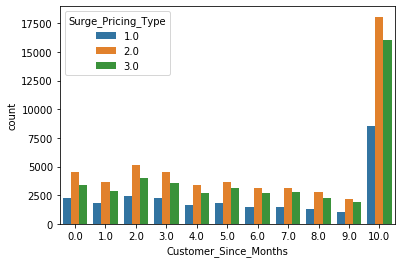

In [27]:
sns.countplot(x='Customer_Since_Months',data=df,hue='Surge_Pricing_Type',orient ='h')

In [28]:
# df_temp2 = df[df['Customer_Since_Months'] == 10.0]
df_temp2 = df[df['Customer_Since_Months'] != 10.0]

In [29]:
df_temp2.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2.0
7,T0005689472,18.44,B,2.0,2.81871,B,A,3.58250,0,103.0,46,63,Male,2.0
8,T0005689473,106.80,C,3.0,NaN,NaN,A,3.14625,0,NaN,58,92,Male,2.0
9,T0005689474,107.19,D,5.0,3.04467,B,A,2.44375,1,NaN,58,83,Male,3.0
11,T0005689477,90.93,NaN,0.0,2.95327,C,C,2.93500,1,NaN,46,63,Male,2.0


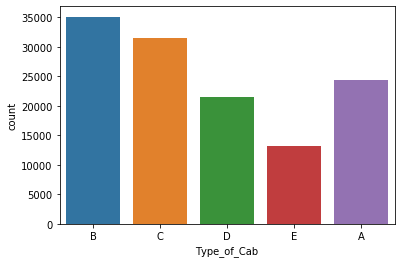

In [30]:
sns.countplot(x='Type_of_Cab',data=df_temp2,label='count')

In [31]:
# df[df['Customer_Since_Months'].isna()].head(10)

### Surge_Pricing_Type vs Trip_distance

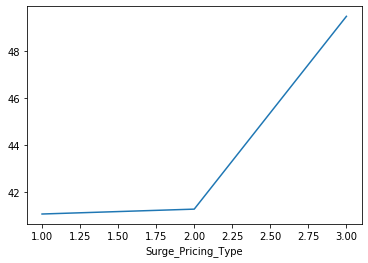

In [32]:
df.groupby('Surge_Pricing_Type')['Trip_Distance'].mean().plot()

In [33]:
df_temp1 = df[df['Trip_Distance'] < 40]
# df_temp1 = df[df['Trip_Distance'] > 80]

In [34]:
df_temp1.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.9050,0,40.0,46,60,Female,2.0
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.4500,0,38.0,56,78,Male,2.0
5,T0005689469,19.06,E,10.0,NaN,NaN,A,2.5975,1,72.0,63,91,Male,3.0
6,T0005689470,29.72,E,10.0,2.83958,C,B,2.9750,1,83.0,50,75,Male,2.0
7,T0005689472,18.44,B,2.0,2.81871,B,A,3.5825,0,103.0,46,63,Male,2.0


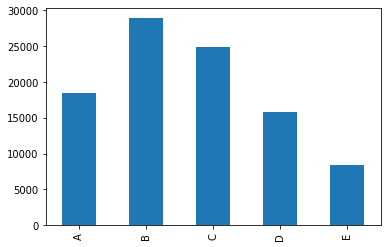

In [35]:
df_temp1['Type_of_Cab'].value_counts().sort_index().plot(kind='bar')

### Destination_Type & Type_of_Cab

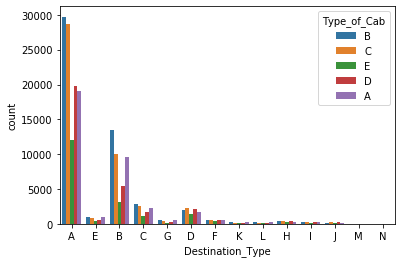

In [36]:
sns.countplot(x='Destination_Type',data=df,hue='Type_of_Cab')

In [37]:
#df_temp3 = df[(df['Destination_Type'] == 'A') & (df['Customer_Since_Months'] == 10.0)]

### Life_Style_Index vs. Confidence_Life_Style_Index

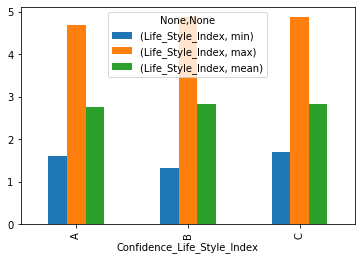

In [38]:
df.groupby('Confidence_Life_Style_Index').agg({"Life_Style_Index": ['min','max','mean']}).plot(kind='bar')

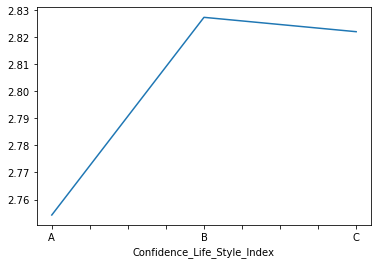

In [39]:
df.groupby('Confidence_Life_Style_Index')['Life_Style_Index'].mean().plot()

### Life_Style_Index vs. Customer_Rating

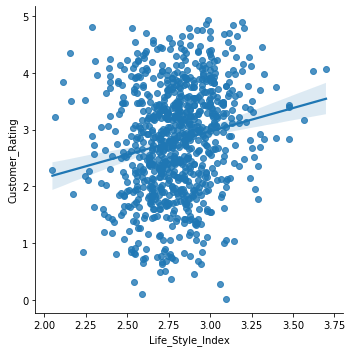

In [40]:
sns.lmplot(x='Life_Style_Index',y='Customer_Rating',data=df.sample(1000),fit_reg=True,markers="o",palette='Blues-d')

### Life_Style_Index vs.Trip_Distance

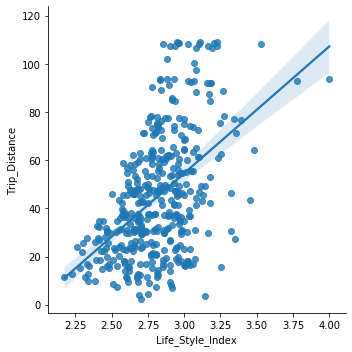

In [41]:
sns.lmplot(x='Life_Style_Index',y='Trip_Distance',data=df.sample(500),fit_reg=True,markers="o",palette='Blues-d')

### 'Surge_price_Type' vs 'Type_of_Cab'

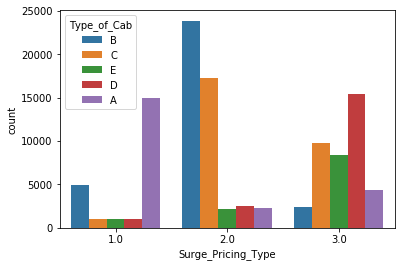

In [42]:
sns.countplot(x='Surge_Pricing_Type',data=df,hue='Type_of_Cab')

### 'Surge_price_Type' vs 'Confidence_Life_Style_Index'

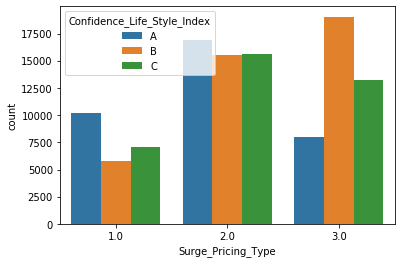

In [43]:
sns.countplot(x='Surge_Pricing_Type',data=df,hue='Confidence_Life_Style_Index')

### 'Cancellation_Last_1Month' vs 'Surge_Pricing_Type'

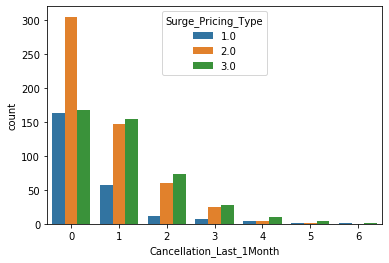

In [44]:
sns.countplot(x='Cancellation_Last_1Month',data=df.sample(2000),hue='Surge_Pricing_Type')

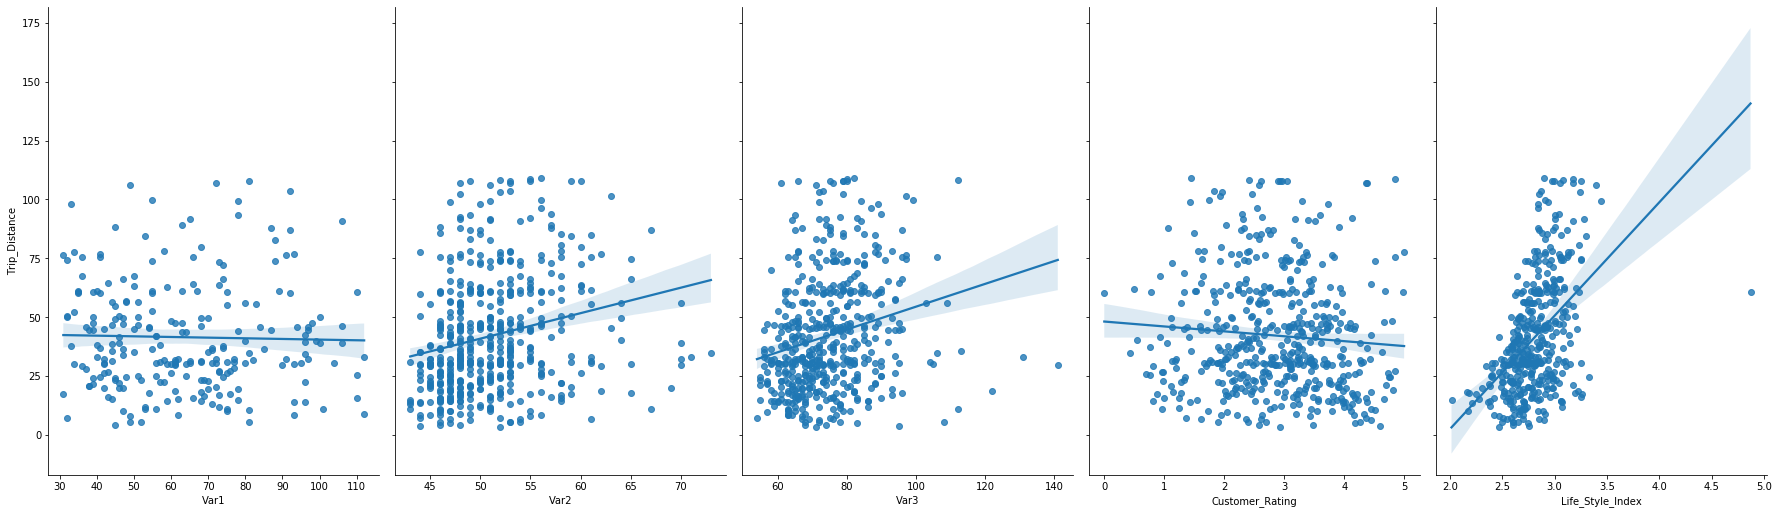

In [45]:
sns.pairplot(df.sample(500), x_vars= ('Var1','Var2','Var3','Customer_Rating','Life_Style_Index'), y_vars='Trip_Distance',height=7,aspect=0.7,kind='reg')

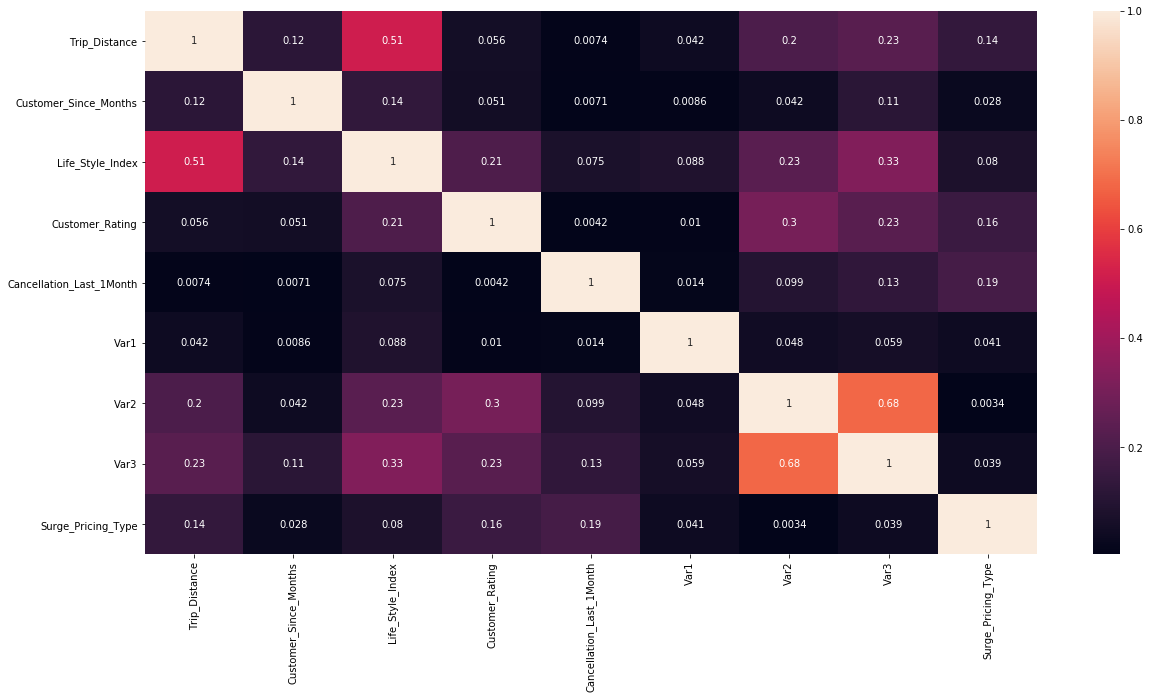

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True)

In [100]:
df['Trip_ID'].value_counts()

T0005734178    1
T0005902379    1
T0005840259    1
T0005780565    1
T0005701408    1
              ..
T0005710526    1
T0005764228    1
T0005905099    1
T0005696595    1
T0005878101    1
Name: Trip_ID, Length: 219057, dtype: int64

In [101]:
df.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type             float64
dtype: object

## Imputation

In [216]:
df.isna().sum()

Trip_ID                             0
Trip_Distance                       0
Type_of_Cab                     33368
Customer_Since_Months            9886
Life_Style_Index                33520
Confidence_Life_Style_Index     33520
Destination_Type                    0
Customer_Rating                     0
Cancellation_Last_1Month            0
Var1                           117819
Var2                                0
Var3                                0
Gender                              0
Surge_Pricing_Type              87395
dtype: int64

In [653]:
df_copy = df.copy()

In [654]:
df_copy['Life_Style_Index'].fillna(value = df_copy['Life_Style_Index'].mean(),inplace=True)

In [655]:
df_copy.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.427690,A,A,3.90500,0,40.0,46,60,Female,2.0
1,T0005689461,29.47,B,10.0,2.782450,B,A,3.45000,0,38.0,56,78,Male,2.0
2,T0005689464,41.58,NaN,10.0,2.802594,NaN,E,3.50125,2,NaN,56,77,Male,2.0
3,T0005689465,61.56,C,10.0,2.802594,NaN,A,3.45375,0,NaN,52,74,Male,3.0
4,T0005689467,54.95,C,10.0,3.034530,B,A,3.40250,4,51.0,49,102,Male,2.0


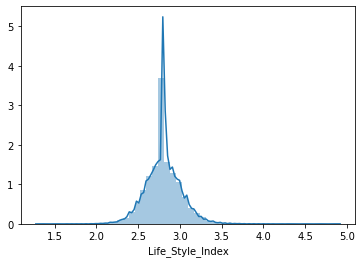

In [656]:
sns.distplot(df_copy['Life_Style_Index'],hist=True)

In [657]:
df_copy['Confidence_Life_Style_Index'].fillna(value = 'D',inplace=True)

In [658]:
# df_copy['Confidence_Life_Style_Index'].replace({1:'A',2:'B',3:'C',4:'D'},inplace=True)

In [659]:
df_copy.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.427690,A,A,3.90500,0,40.0,46,60,Female,2.0
1,T0005689461,29.47,B,10.0,2.782450,B,A,3.45000,0,38.0,56,78,Male,2.0
2,T0005689464,41.58,NaN,10.0,2.802594,D,E,3.50125,2,NaN,56,77,Male,2.0
3,T0005689465,61.56,C,10.0,2.802594,D,A,3.45375,0,NaN,52,74,Male,3.0
4,T0005689467,54.95,C,10.0,3.034530,B,A,3.40250,4,51.0,49,102,Male,2.0


In [660]:
df_copy['Type_of_Cab'].fillna(value = 'F',inplace=True)

In [661]:
df_copy.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.427690,A,A,3.90500,0,40.0,46,60,Female,2.0
1,T0005689461,29.47,B,10.0,2.782450,B,A,3.45000,0,38.0,56,78,Male,2.0
2,T0005689464,41.58,F,10.0,2.802594,D,E,3.50125,2,NaN,56,77,Male,2.0
3,T0005689465,61.56,C,10.0,2.802594,D,A,3.45375,0,NaN,52,74,Male,3.0
4,T0005689467,54.95,C,10.0,3.034530,B,A,3.40250,4,51.0,49,102,Male,2.0


In [662]:
df_copy.isna().sum()

Trip_ID                             0
Trip_Distance                       0
Type_of_Cab                         0
Customer_Since_Months            9886
Life_Style_Index                    0
Confidence_Life_Style_Index         0
Destination_Type                    0
Customer_Rating                     0
Cancellation_Last_1Month            0
Var1                           117819
Var2                                0
Var3                                0
Gender                              0
Surge_Pricing_Type              87395
dtype: int64

In [ ]:
# train_cleaned = combine[combine['target'].isnull()!=True].drop(['enrollee_id'], axis=1)

# Take 1

## Train Test split

In [663]:
train_cleaned = df_copy[df_copy['Surge_Pricing_Type'].isnull()!=True]

In [664]:
train_cleaned.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.427690,A,A,3.90500,0,40.0,46,60,Female,2.0
1,T0005689461,29.47,B,10.0,2.782450,B,A,3.45000,0,38.0,56,78,Male,2.0
2,T0005689464,41.58,F,10.0,2.802594,D,E,3.50125,2,NaN,56,77,Male,2.0
3,T0005689465,61.56,C,10.0,2.802594,D,A,3.45375,0,NaN,52,74,Male,3.0
4,T0005689467,54.95,C,10.0,3.034530,B,A,3.40250,4,51.0,49,102,Male,2.0


In [665]:
train_cleaned.shape

(131662, 14)

In [666]:
X = train_cleaned[train_cleaned['Surge_Pricing_Type'].isnull()!=True].drop(['Surge_Pricing_Type','Trip_ID','Var1','Customer_Since_Months'], axis=1)
y = train_cleaned[train_cleaned['Surge_Pricing_Type'].isnull()!=True]['Surge_Pricing_Type']

In [667]:
print(X.shape)
print(y.shape)

(131662, 10)
(131662,)


In [668]:
X_test = df_copy[df_copy['Surge_Pricing_Type'].isnull()==True].drop(['Trip_ID','Surge_Pricing_Type','Var1','Customer_Since_Months'], axis=1)

In [669]:
X_test.shape

(87395, 10)

In [670]:
X.dtypes

Trip_Distance                  float64
Type_of_Cab                     object
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var2                             int64
Var3                             int64
Gender                          object
dtype: object

In [671]:
X.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Gender                         0
dtype: int64

In [603]:
logreg = LogisticRegression(solver='lbfgs')
#logreg.fit(X,y)


In [672]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [673]:
transformers = [
               
               ("num", StandardScaler(), ['Trip_Distance', 'Life_Style_Index','Customer_Rating','Var2','Var3']),
               ("cat", OneHotEncoder(handle_unknown='ignore'), ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type','Gender']),
               ]


In [675]:
transformer = ColumnTransformer(transformers = transformers,remainder='passthrough')

In [676]:
pipe_xgb1 = make_pipeline(transformer,clfxgb)

In [677]:
pipe_xgb1.fit(X,y)

[19:15:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Trip_Distance',
                                                   'Life_Style_Index',
                                                   'Customer_Rating', 'Var2',
                                                   'Var3']),
                                                 ('cat',
                                                  OneHotEncoder(categories='auto',
                                    

In [678]:
pipe_xgb1.predict(X_test)

array([1., 2., 2., ..., 1., 2., 2.])

In [679]:
cross_val_score(pipe_xgb1,X,y,cv=5,scoring='accuracy').mean()

[19:17:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:18:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:18:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
 

0.6991311019369878

In [607]:
pipegbm = make_pipeline(transformer,clf)

In [609]:
pipegbm.fit(X,y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Trip_Distance',
                                                   'Life_Style_Index',
                                                   'Customer_Rating', 'Var2',
                                                   'Var3']),
                                                 ('cat',
                                                  OneHotEncoder(categories='auto',
                                    

In [611]:
pipegbm.predict(X_test)

array([1., 2., 2., ..., 1., 2., 2.])

In [612]:
cross_val_score(pipegbm,X,y,cv=5,scoring='accuracy').mean()

0.6976120642164585

In [613]:
submission_gbm1st = pd.DataFrame()

In [615]:
submission_gbm1st['Trip_ID'] = df_copy[df_copy['Surge_Pricing_Type'].isnull()==True]['Trip_ID']

In [617]:
submission_gbm1st['Surge_Pricing_Type'] = pipegbm.predict(X_test)

In [618]:
submission_gbm1st.to_csv('submission_gbm1.csv', index=False, header=True)

In [258]:
pipe = make_pipeline(transformer,logreg)

In [259]:
pipe.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Trip_Distance',
                                                   'Life_Style_Index',
                                                   'Customer_Rating', 'Var2',
                                                   'Var3']),
                                                 ('cat',
                                                  OneHotEncoder(categories='auto',
                                    

In [260]:
cross_val_score(pipe,X,y,cv=5,scoring='accuracy').mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.6914219817845083

In [266]:
pipe.predict(X_test)

array([1., 2., 2., ..., 1., 2., 2.])

In [272]:
X_test.head()

,Trip_Distance,Type_of_Cab,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender
0,9.44,A,2.57438,A,B,3.68000,2,46,63,Male
1,32.15,B,2.85143,A,A,1.59375,0,49,80,Female
2,10.38,C,2.70530,A,D,4.50500,0,47,74,Male
3,14.94,F,2.48159,C,E,4.53000,0,43,54,Male
4,32.03,B,2.81598,A,K,4.60125,3,44,56,Male


In [267]:
submission = pd.DataFrame()

In [269]:
submission['Trip_ID'] = df_copy[df_copy['Surge_Pricing_Type'].isnull()==True]['Trip_ID']

In [270]:
submission.head()

,Trip_ID
0,T0005689459
1,T0005689462
2,T0005689463
3,T0005689466
4,T0005689468


In [273]:
submission['Surge_Pricing_Type'] = pipe.predict(X_test)

In [274]:
submission.head()

,Trip_ID,Surge_Pricing_Type
0,T0005689459,1.0
1,T0005689462,2.0
2,T0005689463,2.0
3,T0005689466,2.0
4,T0005689468,2.0


In [276]:
submission.tail()

,Trip_ID,Surge_Pricing_Type
87390,T0005908503,2.0
87391,T0005908504,2.0
87392,T0005908505,1.0
87393,T0005908511,2.0
87394,T0005908515,2.0


In [275]:
submission.isna().sum()

Trip_ID               0
Surge_Pricing_Type    0
dtype: int64

In [277]:
submission.shape

(87395, 2)

In [278]:
submission.to_csv('submission.csv', index=False, header=True)

### RF/DT/KNN

In [279]:
from sklearn.ensemble import RandomForestClassifier

In [280]:
rfclf = RandomForestClassifier(max_depth=3, random_state=67)

In [281]:
pipe_rfclf = make_pipeline(transformer,rfclf)

In [282]:
pipe_rfclf.fit(X,y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Trip_Distance',
                                                   'Life_Style_Index',
                                                   'Customer_Rating', 'Var2',
                                                   'Var3']),
                                                 ('cat',
                                                  OneHotEncoder(categories='auto',
                                    

In [283]:
cross_val_score(pipe_rfclf,X,y,cv=5,scoring='accuracy').mean()

0.6755327911793598

In [284]:
pipe_rfclf.predict(X_test)

array([1., 2., 2., ..., 1., 2., 2.])

In [285]:
submissionrf = pd.DataFrame()

In [286]:
submissionrf['Trip_ID'] = df_copy[df_copy['Surge_Pricing_Type'].isnull()==True]['Trip_ID']

In [288]:
submissionrf['Surge_Pricing_Type'] = pipe_rfclf.predict(X_test)

In [289]:
submissionrf.to_csv('submission_rf.csv', index=False, header=True)

In [290]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(random_state=0)

In [291]:
pipe_dtclf = make_pipeline(transformer,dtclf)

In [292]:
pipe_dtclf.fit(X,y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Trip_Distance',
                                                   'Life_Style_Index',
                                                   'Customer_Rating', 'Var2',
                                                   'Var3']),
                                                 ('cat',
                                                  OneHotEncoder(categories='auto',
                                    

In [293]:
pipe_dtclf.predict(X_test)

array([2., 1., 1., ..., 1., 2., 2.])

In [294]:
cross_val_score(pipe_dtclf,X,y,cv=5,scoring='accuracy').mean()

0.5759976543774217

In [296]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [297]:
pipe_neigh = make_pipeline(transformer,neigh)

In [298]:
pipe_neigh.fit(X,y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Trip_Distance',
                                                   'Life_Style_Index',
                                                   'Customer_Rating', 'Var2',
                                                   'Var3']),
                                                 ('cat',
                                                  OneHotEncoder(categories='auto',
                                    

In [299]:
pipe_neigh.predict(X_test)

array([1., 2., 2., ..., 1., 2., 2.])

In [300]:
cross_val_score(pipe_neigh,X,y,cv=5,scoring='accuracy').mean()

0.62099165118062

## Take2

In [368]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2.0
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2.0
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2.0
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3.0
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2.0


In [305]:
# df['Customer_Since_Months'].mode()[0]

10.0

In [624]:
df_copy1 = df.copy()

In [625]:
df_copy1['Var11'] = df_copy1['Var1'].apply(np.log)
df_copy1['Var12'] = df_copy1['Var2'].apply(np.log)
df_copy1['Var13'] = df_copy1['Var3'].apply(np.log)

In [626]:
df_copy1.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,Var11,Var12,Var13
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2.0,3.688879,3.828641,4.094345
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2.0,3.637586,4.025352,4.356709
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2.0,NaN,4.025352,4.343805
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3.0,NaN,3.951244,4.304065
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2.0,3.931826,3.891820,4.624973


In [627]:
df_copy1.drop(['Var1','Var2','Var3'],axis=1,inplace=True)

In [628]:
df_copy1.isna().sum()

Trip_ID                             0
Trip_Distance                       0
Type_of_Cab                     33368
Customer_Since_Months            9886
Life_Style_Index                33520
Confidence_Life_Style_Index     33520
Destination_Type                    0
Customer_Rating                     0
Cancellation_Last_1Month            0
Gender                              0
Surge_Pricing_Type              87395
Var11                          117819
Var12                               0
Var13                               0
dtype: int64

In [629]:
df_copy1['Life_Style_Index'].fillna(value = df_copy1['Life_Style_Index'].mean(),inplace=True)

In [630]:
df_copy1['Type_of_Cab'].fillna(value = 'F',inplace=True)

In [631]:
df_copy1['Var11'].fillna(value = df_copy1['Var11'].mean(),inplace=True)

In [632]:
df_copy1['Confidence_Life_Style_Index'].fillna(value = 'D',inplace=True)

In [633]:
df_copy1['Customer_Since_Months'].fillna(value = 10.0,inplace=True)

In [634]:
train_cleaned_1 = df_copy1[df_copy1['Surge_Pricing_Type'].isnull()!=True]

In [635]:
X = train_cleaned_1[train_cleaned_1['Surge_Pricing_Type'].isnull()!=True].drop(['Surge_Pricing_Type','Trip_ID','Customer_Since_Months'], axis=1)
y = train_cleaned_1[train_cleaned_1['Surge_Pricing_Type'].isnull()!=True]['Surge_Pricing_Type']

In [636]:
print(X.shape)
print(y.shape)

(131662, 11)
(131662,)


In [637]:
X_test = df_copy1[df_copy1['Surge_Pricing_Type'].isnull()==True].drop(['Trip_ID','Surge_Pricing_Type','Customer_Since_Months'], axis=1)

In [638]:
X_test.shape

(87395, 11)

In [639]:
X.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Gender                         0
Var11                          0
Var12                          0
Var13                          0
dtype: int64

In [640]:
X.head()

,Trip_Distance,Type_of_Cab,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender,Var11,Var12,Var13
0,6.77,B,2.427690,A,A,3.90500,0,Female,3.688879,3.828641,4.094345
1,29.47,B,2.782450,B,A,3.45000,0,Male,3.637586,4.025352,4.356709
2,41.58,F,2.802594,D,E,3.50125,2,Male,4.102318,4.025352,4.343805
3,61.56,C,2.802594,D,A,3.45375,0,Male,4.102318,3.951244,4.304065
4,54.95,C,3.034530,B,A,3.40250,4,Male,3.931826,3.891820,4.624973


In [384]:
from sklearn.impute import KNNImputer

In [385]:
impute_knn = KNNImputer(n_neighbors=4)

#impute_knn.fit_transform(X)

In [641]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [642]:
transformers = [
            
               ("num", StandardScaler(), ['Trip_Distance', 'Life_Style_Index','Customer_Rating','Cancellation_Last_1Month','Var11','Var12','Var13']),
               ("cat", OneHotEncoder(handle_unknown='ignore'), ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type','Gender']),
               ]


In [643]:
transformer = ColumnTransformer(transformers = transformers,remainder='passthrough')

In [555]:
pipe11 = make_pipeline(transformer,rfclf)

In [556]:
pipe11.fit(X,y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Trip_Distance',
                                                   'Life_Style_Index',
                                                   'Customer_Rating',
                                                   'Cancellation_Last_1Month',
                                                   'Var11', 'Var12', 'Var13']),
                                                 ('cat',
                             

In [557]:
pipe11.predict(X_test)

array([1., 2., 2., ..., 1., 2., 2.])

In [558]:
cross_val_score(pipe11,X,y,cv=5,scoring='accuracy').mean()

0.6854369554327269

In [568]:
submission1 = pd.DataFrame()

In [569]:
submission1['Trip_ID'] = df_copy1[df_copy1['Surge_Pricing_Type'].isnull()==True]['Trip_ID']

In [570]:
submission1['Surge_Pricing_Type'] = pipe11.predict(X_test)

In [571]:
submission1.to_csv('submission_rf1_take2.csv', index=False, header=True)

In [564]:
pipe12 = make_pipeline(transformer,logreg)

In [565]:
pipe12.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Trip_Distance',
                                                   'Life_Style_Index',
                                                   'Customer_Rating',
                                                   'Cancellation_Last_1Month',
                                                   'Var11', 'Var12', 'Var13']),
                                                 ('cat',
                             

In [566]:
pipe12.predict(X_test)

array([1., 2., 2., ..., 1., 2., 2.])

In [567]:
cross_val_score(pipe12,X,y,cv=5,scoring='accuracy').mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.6916954018133208

In [574]:
submission2 = pd.DataFrame()

In [575]:
submission2['Trip_ID'] = df_copy1[df_copy1['Surge_Pricing_Type'].isnull()==True]['Trip_ID']

In [576]:
submission1['Surge_Pricing_Type'] = pipe12.predict(X_test)

In [577]:
submission1.to_csv('submission_logreg1_take2.csv', index=False, header=True)

In [580]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)

In [581]:
pipe13 = make_pipeline(transformer,clf)

In [582]:
pipe13.fit(X,y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Trip_Distance',
                                                   'Life_Style_Index',
                                                   'Customer_Rating',
                                                   'Cancellation_Last_1Month',
                                                   'Var11', 'Var12', 'Var13']),
                                                 ('cat',
                             

In [583]:
pipe13.predict(X_test)

array([1., 2., 2., ..., 1., 2., 2.])

In [584]:
cross_val_score(pipe13,X,y,cv=5,scoring='accuracy').mean()

0.7000653062643347

In [590]:
submission3 = pd.DataFrame()

In [591]:
submission3['Trip_ID'] = df_copy1[df_copy1['Surge_Pricing_Type'].isnull()==True]['Trip_ID']

In [592]:
submission3['Surge_Pricing_Type'] = pipe13.predict(X_test)

In [593]:
submission3.to_csv('submission_gbm.csv', index=False, header=True)

In [620]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [621]:
import xgboost as xgb

In [622]:
from xgboost import XGBClassifier

In [623]:
clfxgb = XGBClassifier(max_depth=3,njobs=-1,objective ='multi:softprob',eta=0.3,num_class=3)

In [644]:
pipexgb = make_pipeline(transformer,clfxgb)

In [645]:
pipexgb.fit(X,y)

[18:56:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Trip_Distance',
                                                   'Life_Style_Index',
                                                   'Customer_Rating',
                                                   'Cancellation_Last_1Month',
                                                   'Var11', 'Var12', 'Var13']),
                                                 ('cat',
                             

In [646]:
pipexgb.predict(X_test)

array([1., 2., 2., ..., 1., 2., 2.])

In [648]:
cross_val_score(pipexgb,X,y,cv=5,scoring='accuracy').mean()

[18:58:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:58:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:58:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
 

0.7032249218444526

In [649]:
submissionfin = pd.DataFrame()

In [650]:
submissionfin['Trip_ID'] = df_copy1[df_copy1['Surge_Pricing_Type'].isnull()==True]['Trip_ID']

In [651]:
submissionfin['Surge_Pricing_Type'] = pipexgb.predict(X_test)

In [652]:
submissionfin.to_csv('submission_xgb.csv', index=False, header=True)